In [0]:
import pandas as pd
from   scipy.stats import binom
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import math


$$ \begin{align*}
    P[E]=\frac{N_E}{N_S}\\
      =\frac{\textrm{Número de resultados no evento E}}{\textrm{Número total de resultados em S}}
\end{align*} $$





In [0]:
# Criando uma função que determina a probabilidade
def P_E(resultados_eventos, resultado_espaco):
    probabilidade = (resultados_eventos / resultado_espaco) * 100
    return round(probabilidade, 1)

# Espaço amostral cartas

cartas = 52
carta = 1
probabilidade_as = P_E(carta,cartas)


# Mostra o resultado
print(str(probabilidade_as ) + '%')


1.9%


Retirada sem reposição:

\begin{align*}
    (N)_r =N(N-1) \dots (N-r+1) = \mathbf{\frac{N!}{(N-r)!}} \\
    \textrm{considerando r-tuplas}
\end{align*}

In [117]:
# Criando uma função que determina permutacoes
def perm(N,r):
    permutacoes = math.factorial(N)/math.factorial(N-r)
    return round(permutacoes, 1)

# Espaço amostral cartas

cartas = 52
mao = 5
permutacoes_mao = perm(cartas,mao)


# Mostra o resultado
print(str(permutacoes_mao))


311875200.0


\begin{align*}
\binom{N}{k} = \frac{(N)_k}{k!} = \frac{N!}{(N-k)!k!}
\end{align*}

In [0]:
# Criando uma função que determina combinações
def comb(N,r):
    combinacoes = math.factorial(N)/(math.factorial(r)*math.factorial(N-r))
    return round(combinacoes, 1)

# Espaço amostral cartas

cartas = 52
mao = 5
combinacoes_mao = comb(cartas,mao)


# Mostra o resultado
print(str(combinacoes_mao))

2598960.0


**Problema 01** - Supondo um grupo de N pessoas, qual a probabilidade de que ao menos duas pessoas tenham nascido no mesmo dia?


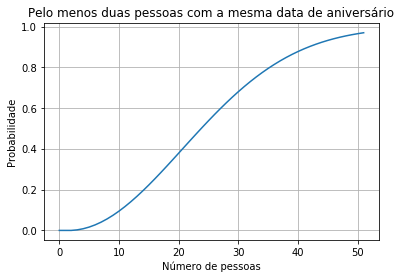

In [106]:
x = np.linspace(0,50,51)
P = [0]
for i in range(0,51):
    aux = 1 - perm(365,x[i])/365**x[i]
    P.append(aux)

########

plt.plot(P)
plt.xlabel('Número de pessoas')
plt.ylabel('Probabilidade')
plt.title('Pelo menos duas pessoas com a mesma data de aniversário')
plt.grid(True)

plt.show()



In [0]:
# Mostra o resultado
print(str(aux))

0.9703735795779884


**Distribuição Binomial** 
O modelo de distribuição binomial trata da probabilidade de sucesso que um evento que possui apenas dois resultados possíveis em uma série de experimentos. Por exemplo, jogar uma moeda: cara ou coroa. Em essência a distribuiçõa trata de sucesso ou fracasso.

\begin{align*}
P[E] = P[X=k] = \binom{N}{k} p^k (1-p)^k
\end{align*}

In [0]:
n, p = 20, 0.8
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')

# Mostra o resultado
print(str(mean))          

16.0


[Text(0, 0.5, 'Probabilidade'), Text(0.5, 0, 'k - sucessos')]

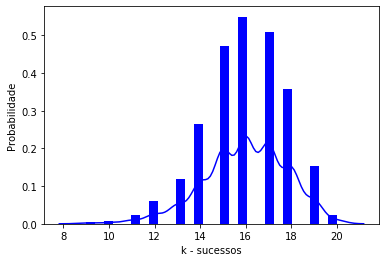

In [0]:
data_binom = binom.rvs(n=20,p=0.8,loc=0,size=1000)
ax = sb.distplot(data_binom,
                  kde=True,
                  color='blue',
                  hist_kws={"linewidth": 25,'alpha':1})
ax.set(xlabel='k - sucessos', ylabel='Probabilidade')

**Problema 02 -  Controle de qualidade** Com o intuito de investigar uma reclamação acerca de produtos defeituosos, o gestor de compras de um Hospital deciciu contratar uma empresa para realizar um teste sistemático. O objetivo é **aceitar ou rejeitar** um determinado lote controlado. Cada lote possui 1000 produtos e deicidiu-se testar 100 amostras de cada lote e avaliá-las. A tomada de decisão será feita de acordo com o critério: se houver um total de 95% ou mais de produtos **bons** o lote será **aceito**, caso contrário, será **rejeitado.**  Para o caso de um lote defeituoso a proporção de produtos bons é dada por **p** e defeituosos por **(1-p)**. Verifique como a probabilidade de aceitarmos um lote defeituoso varia de acordo com a proporção **p**. Qual a probabilidade de aceitação de um lote defeituoso caso $$p=0.94$$.

**Solução** Vamos começar para o caso onde a proporção de um lote defeituoso é $$p=0.94$$,A pergunta é: qual a probabilidade de tirarmos um produto **bom** quando o lote é defeituoso? Para estimar esta probabilidade (pois não há reposição) podemos utilizar a distribuição binomial para $$N=100 \; k=95$$


\begin{align*}
P[X=95] =  \binom{N}{k} p^k (1-p)^k = \binom{100}{95} 0.94^{95} (1-0.94)^{95}
\end{align*}

No entanto se obtivermos 96 produtos bons o lote defeituoso também será aceito (!) o que inclui as quantidades: 97, 98, 99 e 100. Desta forma a probabilidade de aceitarmos um lote defeituos pode ser calculada por:

\begin{align*}
P[E] = P[X\geq95] = \sum_{k=95}^{100} \binom{N}{k} p^k (1-p)^k 
\end{align*}

Obervser que neste caso temos "**maior ou igual**" e não "**igual**" 


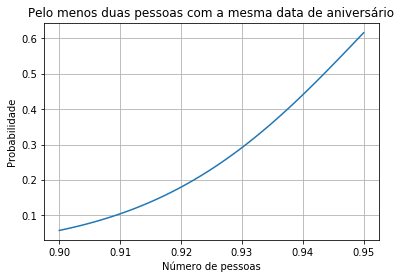

In [132]:
from scipy.stats import binom
import matplotlib.pyplot as plt
import numpy as np


p = np.linspace(0.9,0.95,100)
k = np.linspace(95, 100, 6)
P = np.zeros((100,))
for j in range(0,6):
  Pk = np.zeros((100,))
  for i in range(0,100):
    aux = binom.pmf(k[j],100,p[i],loc=0)
    Pk[i] = Pk[i] + aux
  P = P + Pk

########
plt.plot(p,P)
plt.xlabel('Número de pessoas')
plt.ylabel('Probabilidade')
plt.title('Pelo menos duas pessoas com a mesma data de aniversário')
plt.grid(True)
plt.show()



In [130]:
# Criando uma função que determina permutacoes
def bin_Npk(N,p,k):
    binomial_Npk = math.factorial(N)/(math.factorial(k)*math.factorial(N-k))*(p**k)*((1-p)**(N-k))
    return round(binomial_Npk, 5)

# Espaço amostral cartas

bin_Npk(100,0.95,95)



0.18002

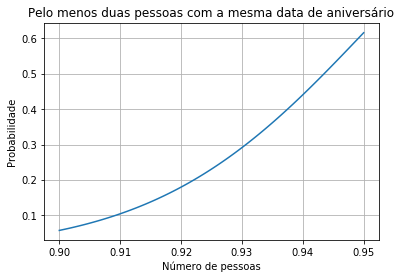

In [131]:
from scipy.stats import binom
import matplotlib.pyplot as plt
import numpy as np


p = np.linspace(0.9,0.95,100)
k = np.linspace(95, 100, 6)
P = np.zeros((100,))
for j in range(0,6):
  Pk = np.zeros((100,))
  for i in range(0,100):
    aux = bin_Npk(100,p[i],k[j])
    Pk[i] = Pk[i] + aux
  P = P + Pk

########
plt.plot(p,P)
plt.xlabel('Número de pessoas')
plt.ylabel('Probabilidade')
plt.title('Pelo menos duas pessoas com a mesma data de aniversário')
plt.grid(True)
plt.show()
